**Rice Leaf Disease Prediction**

We will use CNN to classify images to predict type of rice plant diseases.


Import Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import sklearn.metrics as metrics
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pathlib
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

**Dataset**

We are considering three most common types of rice plant diseases: -

*   Leaf Smut
*   Brown Spot
*   Bacterial leaf blight

Dataset Link: - [Link](https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases)

There are 40 images of size 120 jpg belonging to each of the three class.




Image Dataset Paths (after uploading the dataset on Google drive) : -

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data.zip', 'r') 
zip_ref.extractall('/dataset') 
zip_ref.close()



Mounted at /content/drive


Checking the contents of folders: -


In [3]:
# Dataset Folder

data_dir = '/dataset/data/rice_leaf_diseases/'

data_dir=pathlib.Path(data_dir) 

bacteria=list(data_dir.glob("bacterial_leaf_blight/*"))
len(bacteria)


40

Split the image dataset for training and testing: -

In [4]:
IMG_WIDTH = 180
IMG_HEIGHT = 180


dict={"bacteria":list(data_dir.glob("bacterial_leaf_blight/*")),
      "brown":list(data_dir.glob("brown_spot/*")),
      "smut":list(data_dir.glob("leaf_smut/*"))}

labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
   
}      

 

X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resized = cv2.resize(img,(180,180))
        X.append(img_resized)
        y.append(labels_dict[name])

 

In [5]:
X = np.array(X)
y = np.array(y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

Rescale the images: -

In [7]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255
 

In [8]:
data_augmentation = tensorflow.keras.Sequential(
  [

    tensorflow.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tensorflow.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tensorflow.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

Building the CNN model using the **Sequential Model** of Tensorflow Keras.


In [9]:
my_model = Sequential()

my_model.add(data_augmentation)

my_model.add(Conv2D(16,(3,3),activation='relu', padding='same'))
my_model.add(MaxPooling2D(2,2))
my_model.add(BatchNormalization())

my_model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
my_model.add(MaxPooling2D(2,2))
my_model.add(BatchNormalization())

my_model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
my_model.add(MaxPooling2D(2,2))
my_model.add(BatchNormalization())

my_model.add(Flatten())
my_model.add(Dense(128,activation='relu'))
my_model.add(Dense(3))




Compile and Train the model: -

In [10]:
my_model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'] )


history = my_model.fit(x_train_scaled, y_train, epochs=30)



Epoch 1/30
3/3 [==============================] - 8s 1s/step - loss: 5.9053 - accuracy: 0.4889
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 3.7720 - accuracy: 0.6667
Epoch 3/30
3/3 [==============================] - 4s 2s/step - loss: 2.6558 - accuracy: 0.7333
Epoch 4/30
3/3 [==============================] - 6s 1s/step - loss: 1.6252 - accuracy: 0.7889
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 0.6453 - accuracy: 0.8778
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 1.6945 - accuracy: 0.8000
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.4623 - accuracy: 0.8778
Epoch 8/30
3/3 [==============================] - 4s 1s/step - loss: 0.8275 - accuracy: 0.8667
Epoch 9/30
3/3 [==============================] - 4s 1s/step - loss: 0.3819 - accuracy: 0.8556
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 0.2021 - accuracy: 0.9444
Epoch 11/30
3/3 [==============================] 

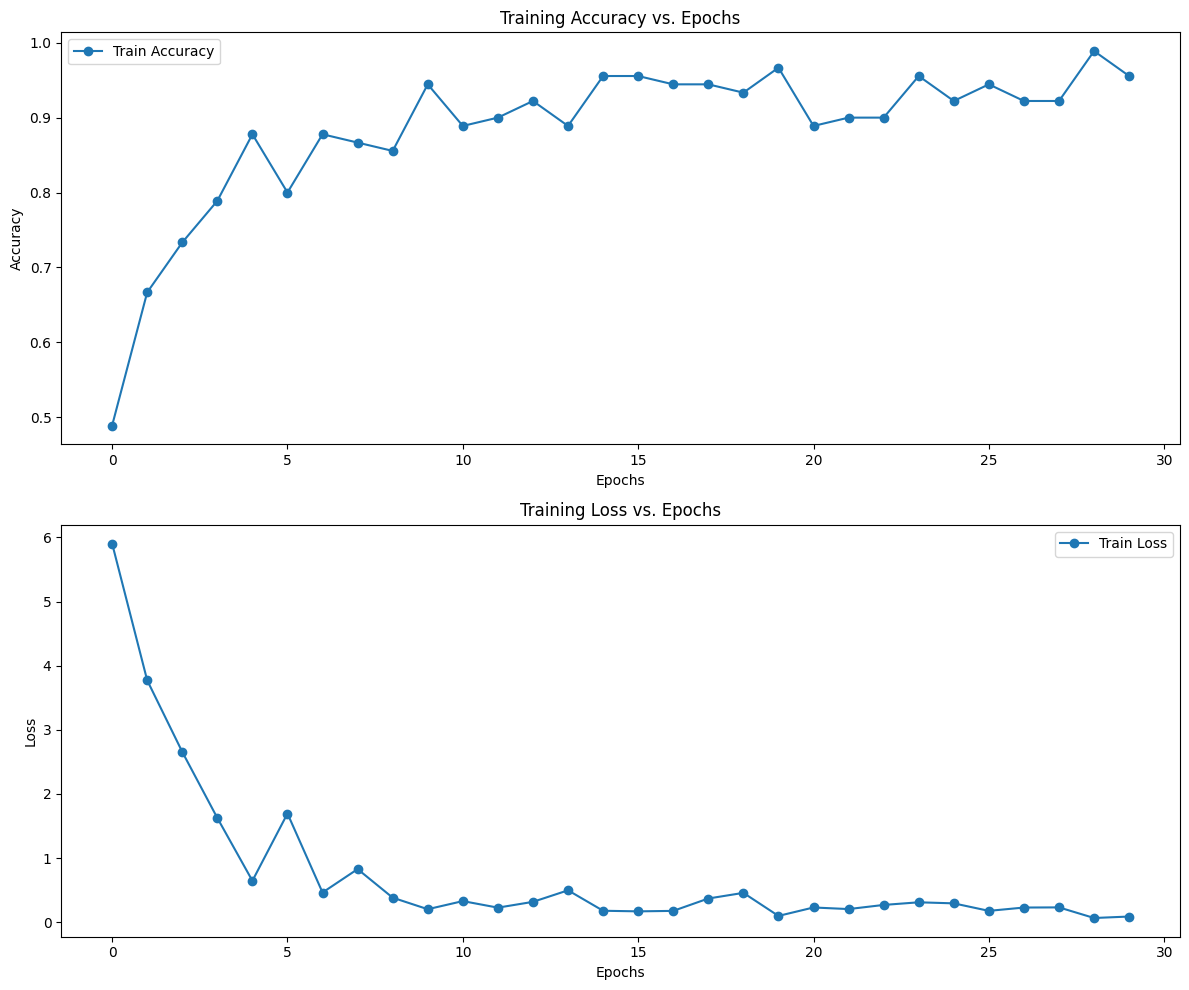

In [11]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

Testing the model on test dataset: -

In [12]:
my_model.evaluate(x_test_scaled,y_test)


1/1 [==============================] - 1s 584ms/step - loss: 3.4325 - accuracy: 0.4333


[3.4325461387634277, 0.4333333373069763]